<a href="https://colab.research.google.com/github/Minkowski104/thermal-image-face-recognizer/blob/main/Thermal_Image_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [49]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(r'/content/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2,minNeighbors=5);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]


In [16]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)

    faces = []
    #list to hold labels for all subjects
    labels = []
    #let's go through each directory and read images within it
    for dir_name in dirs:   
        print("Reading "+dir_name)  
        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("S"):
             continue;
#------STEP-2--------
#extract label number of subject from dir_name
#format of dir name = slabel
#, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("S", ""))
        subject_dir_path = data_folder_path + "/" + dir_name
        subject_images_names = os.listdir(subject_dir_path)
        for image_name in subject_images_names:    
            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name
            #read image
            image = cv2.imread(image_path)
            
            face, rect = detect_face(image)

            if face is not None:
                faces.append(face)
                labels.append(label)
            cv2.destroyAllWindows()
            cv2.waitKey(1)
        
    #cv2.destroyAllWindows()
    return faces, labels

In [17]:
print("Preparing data...")
faces, labels = prepare_training_data(r"/content/Dataset")
print("Data prepared")

Preparing data...
Reading S2
Reading S5
Reading S7
Reading S1
Reading S8
Reading S3
Reading S6
Reading S10
Reading S9
Reading .ipynb_checkpoints
Reading S4
Data prepared


In [18]:
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Total faces:  1421
Total labels:  1421


In [19]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [20]:
face_recognizer.train(faces, np.array(labels))

In [23]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [25]:
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [45]:
def predict(test_img):
    img = test_img.copy()
    face, rect = detect_face(img)
    label = face_recognizer.predict(face)
    label_text = str(label[0])
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    return img

Predicting images...
Prediction complete


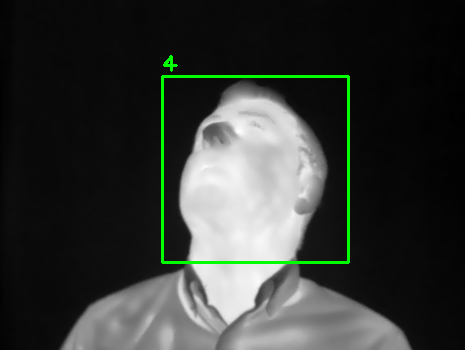

In [48]:
print("Predicting images...")
# load test images
test_img1 = cv2.imread(r"/content/Dataset/S4/N411012.jpg")
# perform a prediction
predicted_img1 = predict(test_img1)
print("Prediction complete")
# display both images

cv2_imshow(predicted_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()